In [1]:
# Inline interactive widgets
%matplotlib nbagg

# Ecosistema SciPy

# Python Scientific Computing Environment

Un típico entorno para cómputo científico en Python se compone de distintas herramienas *dedicadas*. Por ejemplo:
- Optimización
- Plotting (gráficas) y visualización
- Análisis de datos
- Shell interactiva
- Symbolic mathematics (Cálculo simbólico/cálculo algebraico/álgebra computacional/)
- Bases de datos
- Extensiones especializadas (scikits)

# ¿Quién usa SciPy?

- Autodesk
- Bloomberg
- Amazon
- Microsoft
- Intel

# [scipy.org](http://www.scipy.org/)



<img src="img/scipy-web.png" style="float:center;height:400px"/>

# NumPy <img src="img/numpy.svg" style="float:right;height:200px"/>

- Provee métodos para arreglos (arrays) y  la clase: numerical N-dimensional array
- Soporte básico del ecosistema
- Disintinto de `array`

In [ ]:
import numpy as np
np.arange(10)

- Implementado mayormente en C
 - Se puede extender a otras herramientas de análisis númerico
 - Rapidez

In [ ]:
a_pythonic = list(range(10000))
%timeit [v ** 2 for v in a_pythonic]

In [ ]:
b_numpy = np.array(a_pythonic)
%timeit b_numpy ** 2


## Array Indexing

In [ ]:
x = np.arange(100).reshape(5, 20)

# Simple indexing
print(x[2])

print(x)

In [ ]:
# Slicing
print(x[2:5])

In [ ]:
# Boolean indexing
print(x[(x % 2) ==1])

In [ ]:
# Fancy indexing
print(x[[1, 4, 2]])

## Polinomios
$$ p(x) = 1 + 2x + 3x^2 $$

In [ ]:
import numpy as np
from numpy.polynomial import Polynomial as P

# p(x) = 1 + 2*x + 3*(x)^2
polinomio = P([1,2,3])
print(polinomio)

# Suma
print(polinomio + polinomio)

# Resta
print(polinomio - polinomio)


Para aprender más: [An Introduction to Scientific Python (and a Bit of the Maths Behind It) – NumPy](http://www.kdnuggets.com/2016/06/intro-scientific-python-numpy.html)

# Matplotlib <img src="img/matplotlib.png" style="float:right;height:250px">
 - Una imagen vale más que mil palabras
 - Las tablas no lo son todo
 - Herramienta multiplataforma
 - Con soporte interactivo

Como crear una gráfica en tres líneas de código:

<IPython.core.display.Javascript object>


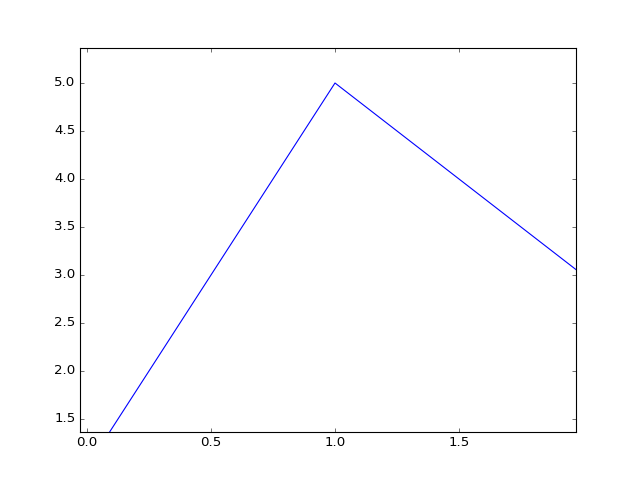

In [2]:
import matplotlib.pyplot as plt
plt.plot([1, 5, 3])
plt.show()

 - Amigable y no obstrusivo
 - Control de detalles 
 - [Variedad de estilos para gráficas](http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part2-Plotting_Methods_Overview.ipynb)
 - [Interactive Applications using Matplotlib](https://www.amazon.com/Interactive-Applications-using-Matplotlib-Benjamin/dp/1783988843?ie=UTF8&ref_=tmm_pap_title_0)

# SciPy  <img src="img/scipy_med.png" style='float:right;width:200px'>
- Un paso adelante de algoritmos básicos de Matemáticas (`import math`)
- Contiene algoritmos para diferentes dominios
 - `constants`
 - `cluster`
 - `fftpack`
 - `integrate`

In [5]:
from scipy import constants
import pint
ureg = pint.UnitRegistry()
m = 10 * ureg.kg
c = constants.c * ureg.meters / ureg.second
E = m*c**2
print(E)

8.987551787368177e+17 kilogram * meter ** 2 / second ** 2


- `interpolate`

In [7]:
import numpy as np
from scipy import interpolate
x, y = np.linspace(-5, 5, 25), np.linspace(-5, 5, 25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
f_rect = interpolate.RectBivariateSpline(x, y, z)

xnew, ynew = np.linspace(-4.5, 4.5, 1000), np.linspace(-4.5, 4.5, 1000)
znew = f_rect(xnew, ynew)

<IPython.core.display.Javascript object>


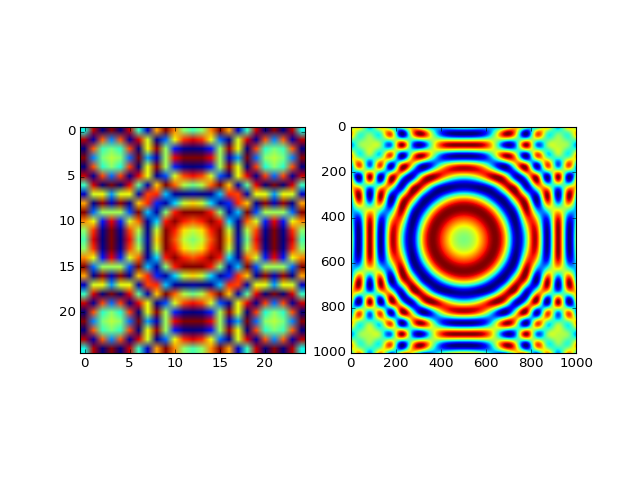

In [8]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(z, vmin=-1, vmax=1)
axes[1].imshow(znew, vmin=-1, vmax=1)

- `io` - Soporte para formatos especificos usandos en investigación
 - matlab, fortran, netcdf3, arff, IDL, wav
 
- `ndimage` - Filtros, transformaciones, convoluciones
 - `measurements` (estadística en pixeles con una categoría)
 - `morphology` (erosión, dilatación)
 - Para funciones avanzadas: [`scikit-image`](http://scikit-image.org)

In [9]:
n_stores = 5
n_customers = 500
stores = np.random.random((n_stores, 2)) * 400
customers = np.random.random((n_customers, 2)) * 400
threshold = 200

In [10]:
d = np.hypot(stores[:, 0][:, np.newaxis] -
             customers[:, 0][np.newaxis, :],
             stores[:, 1][:, np.newaxis] -
             customers[:, 1][np.newaxis, :])
indexes = np.argmin(d, axis=0)
d = d[indexes, np.arange(len(indexes))]
d[d > threshold] = np.inf
indexes[np.isinf(d)] = len(indexes)
rev_indexes = [np.where(indexes == store_i)
               for store_i in range(len(stores))]

<IPython.core.display.Javascript object>


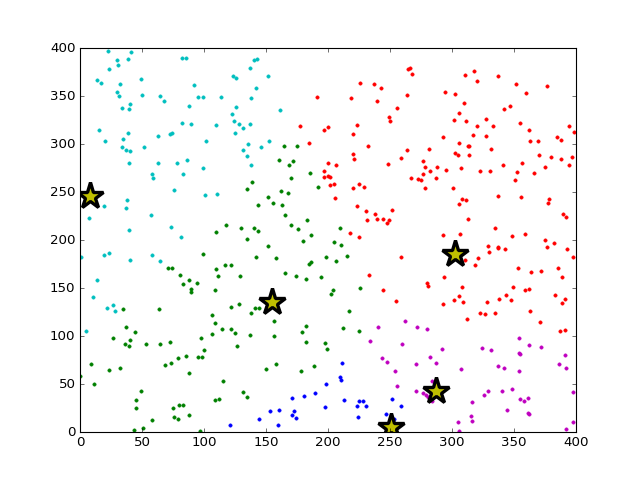

In [11]:
fig, ax = plt.subplots()
for inds, in rev_indexes:
    ax.plot(customers[inds, 0], customers[inds, 1], '.')
ax.plot(stores[:, 0], stores[:, 1], '*y', markersize=25,
        mec='k', mew=3)

- `spatial`

In [12]:
from scipy.spatial import cKDTree as KDTree

In [13]:
%%timeit
store_tree = KDTree(stores)
d, indexes = store_tree.query(customers,
                              distance_upper_bound=threshold)
rev_indexes = [np.where(indexes == store_i)
               for store_i in range(len(stores))]    

The slowest run took 10.02 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 320 µs per loop


In [14]:
KDTree?

- `stats` - Distribuciones estadīsticas 
 - Generación de datos aleatorios en base a una distribución

- Para más funciones de Estadistíca, tenemos el paquete [statsmodels](http://statsmodels.sourceforge.net/)
- [patsy - Describing statistical models in Python](https://github.com/pydata/patsy)

- `special`
 - Funciones Lambda, pero no `lambda`

# Resto del ecosistema SciPy

## Visualización

<img src='img/cartopy.png' style='float:right;height:200px'>
  - [`bokeh`](http://bokeh.pydata.org/en/latest/)
  - [`seaborn`](https://stanford.edu/~mwaskom/software/seaborn/)
  - [`cartopy`](http://scitools.org.uk/cartopy/)
  - [`ggplot`](http://ggplot.yhathq.com/)
  - [`descartes`](https://bitbucket.org/sgillies/descartes/)
  - [`mayavi`](http://code.enthought.com/projects/mayavi/)
  - [`vispy`](http://vispy.org) & [`glumpy`](https://glumpy.github.io/)

In [16]:
from math import log, sqrt
import numpy as np
import pandas as pd
from six.moves import cStringIO as StringIO
from bokeh.plotting import figure, output_notebook, show

antibiotics = """
bacteria,                        penicillin, streptomycin, neomycin, gram
Mycobacterium tuberculosis,      800,        5,            2,        negative
Salmonella schottmuelleri,       10,         0.8,          0.09,     negative
Proteus vulgaris,                3,          0.1,          0.1,      negative
Klebsiella pneumoniae,           850,        1.2,          1,        negative
Brucella abortus,                1,          2,            0.02,     negative
Pseudomonas aeruginosa,          850,        2,            0.4,      negative
Escherichia coli,                100,        0.4,          0.1,      negative
Salmonella (Eberthella) typhosa, 1,          0.4,          0.008,    negative
Aerobacter aerogenes,            870,        1,            1.6,      negative
Brucella antracis,               0.001,      0.01,         0.007,    positive
Streptococcus fecalis,           1,          1,            0.1,      positive
Staphylococcus aureus,           0.03,       0.03,         0.001,    positive
Staphylococcus albus,            0.007,      0.1,          0.001,    positive
Streptococcus hemolyticus,       0.001,      14,           10,       positive
Streptococcus viridans,          0.005,      10,           40,       positive
Diplococcus pneumoniae,          0.005,      11,           10,       positive
"""

drug_color = {
    "Penicillin"   : "#0d3362",
    "Streptomycin" : "#c64737",
    "Neomycin"     : "black",
}


gram_color = {
    "positive" : "#aeaeb8",
    "negative" : "#e69584",
}
df = pd.read_csv(StringIO(antibiotics), skiprows=1, skipinitialspace=True, engine='python')


width = 800
height = 800
inner_radius = 90
outer_radius = 300 - 10

minr = sqrt(log(.001 * 1E4))
maxr = sqrt(log(1000 * 1E4))
a = (outer_radius - inner_radius) / (minr - maxr)
b = inner_radius - a * maxr

big_angle = 2.0 * np.pi / (len(df) + 1)
small_angle = big_angle / 7

def rad(mic):
    return a * np.sqrt(np.log(mic * 1E4)) + b

output_notebook()


Loading BokehJS ...

## PyData y la evolución de los arrays <img src='img/pydata.png' style='float:right;height:200px'>
  - [`pandas`](http://pandas.pydata.org/)
  - [`xarray`](http://xarray.pydata.org/)
  - [`pytables`](http://pytables.org/)
  - [`ibis`](http://www.ibis-project.org/)
  - [`odo`](http://odo.readthedocs.org/en/latest/)
  - [`blaze`](http://blaze.readthedocs.org/en/latest/index.html)
  - [`pint`](https://pint.readthedocs.org)

## Cython / python with rockets <img src='img/cython.png' style='float:right;height:200px'>
  - [`cython`](http://cython.org/)
  - [`numba`](http://numba.pydata.org/)
  - [`numexpr`](https://github.com/pydata/numexpr)
  - [`dask`](http://dask.pydata.org/en/latest/)
  - [`theano`](http://deeplearning.net/software/theano/)

In [17]:
def pyprimes(kmax):
    p = [0] * 1000
    result = []
    if kmax > 1000:
        kmax = 1000
    k = 0
    n = 2
    while k < kmax:
        i = 0
        while i < k and n % p[i] != 0:
            i = i + 1
        if i == k:
            p[k] = n
            k = k + 1
            result.append(n)
        n = n + 1
    return result

In [25]:
%load_ext cython

%cython
def cprimes(int kmax):
    cdef int n, k, i
    cdef int p[1000]
    result = []
    if kmax > 1000:
        kmax = 1000
    k = 0
    n = 2
    while k < kmax:
        i = 0
        while i < k and n % p[i] != 0:
            i = i + 1
        if i == k:
            p[k] = n
            k = k + 1
            result.append(n)
        n = n + 1
    return result

SyntaxError: invalid syntax (<ipython-input-25-0cd6bf807a12>, line 4)

In [21]:
! conda install cython

Using Anaconda Cloud api site https://api.anaconda.org
Fetching package metadata: ....
Solving package specifications: .........

# All requested packages already installed.
# packages in environment at //anaconda/envs/scipy-class:
#
cython                    0.24                     py35_0  


In [ ]:
%timeit pyprimes(5000)
%timeit cprimes(5000)

## Symbolic math <img src='img/sympy_logo.png' style='float:right;height:200px'>
  - [`sympy`](http://sympy.org/)
  - [`sage`](http://www.sagemath.org/)
  - [`patsy`](http://patsy.readthedocs.org/en/latest/index.html)

## Geographic Processing
  - GDAL/OGR  (`osgeo.ogr` & `osgeo.osr`)
  - [`fiona`](http://toblerity.org/fiona/)
  - [`geopandas`](http://geopandas.org/)
  - [`shapely`](http://toblerity.org/shapely/)
  - [`pyproj`](http://jswhit.github.io/pyproj/)
  - [`geopy`](https://geopy.readthedocs.io/)

In [ ]:
from shapely.geometry import Point
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)
c = a.intersection(b)

print(c.area)
print(c.length)
print(c.bounds)

In [ ]:
from descartes import PolygonPatch 
fig, ax = plt.subplots()
ax.set_xlim(-1, 4); ax.set_ylim(-1, 3)
for p, color in zip([a, b, c], 'rcy'):
    ax.add_patch(PolygonPatch(p, fc=color))

## Formatos de archivo para Ciencia/Investigación  <img src='img/logo-pytables-small.png' style='float:right;height:100px'>
  - [`netCDF4`](http://unidata.github.io/netcdf4-python/)
  - [`pytables`](http://pytables.org)
  - [`h5py`](http://www.h5py.org/)
  - [`PyNIO`](https://www.pyngl.ucar.edu/Nio.shtml)
  - GDAL (`osgeo.gdal`)
  - [`rasterio`](https://github.com/mapbox/rasterio)

# Scikits / Dominio especial

<img src='img/scikit-image.png' style='float:right;height:100px'>
  - [`scikit-image`](http://scikit-image.org)
  - [`scikit-learn`](http://scikit-learn.org/stable/)
  - [`astropy`](http://astropy.org)
  - [`statsmodels`](http://statsmodels.sourceforge.net/)
  - [`metpy`](https://github.com/MetPy/MetPy)
  - [`pyart`](http://arm-doe.github.io/pyart/)
  - [Lista Completa](http://scikits.appspot.com/scikits)

## Documentación / Guías de estudio

- [Documentation for core SciPy Stack projects](http://www.scipy.org/docs.html)
- [Lectures on scientific computing with Python, as IPython notebooks. ](https://github.com/jrjohansson/scientific-python-lectures)
- [Scipy Lecture Notes. One document to learn numerics, science, and data with Python](http://www.scipy-lectures.org/)
- [A Crash Course in Python for Scientists](http://nbviewer.jupyter.org/gist/rpmuller/5920182)

## Libros
- [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do): Wes Mckinney
- [Cython - A Guide for Python Programmers](http://shop.oreilly.com/product/0636920033431.do): Kurt Smith
- [Effective Computation in Physics - Field Guide to Research with Python](http://shop.oreilly.com/product/0636920033424.do): Anthony Scopatz & Katy Huff
- [Mastering Matplotlib](http://www.amazon.com/dp/1783987545/ref=pd_lpo_sbs_dp_ss_1?pf_rd_p=1944687622&pf_rd_s=lpo-top-stripe-1&pf_rd_t=201&pf_rd_i=1783988843&pf_rd_m=ATVPDKIKX0DER&pf_rd_r=0SB7JQVV0V78AWESMCEB): Duncan McGreggor

## 🐍
- Vistazo general del ecosistema
- Omitimos Bio y visualización 3D
- [Scientific Computing with Python | Austin, Texas • July 11-17, 2016](http://scipy2016.scipy.org/ehome/index.php?eventid=146062&tabid=332930&)